IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # nice style from 538.com
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter # this is the library used for the survival analysis

IMPORT DATA

In [24]:
# Adding data from csv export as temporary, direct BQ connection for future version
df = pd.read_csv('survival_data.csv')
df.head()

,user_id,churn_flag,weeks_since_activation,friends_flag,young_flag,photo_flag,android_pay_flag,overdraft_flag,chats_flag
0,AACGLPF4S3BTY0KUvMgQF6GCfV/FKbTTUlmr6SFUKLsncu...,0,8,0,1,0,0,0,0
1,AAEGvJwu4vkYws90X8tUJE3MmFbqJ9bQiD26ZgC+V0EHjQ...,0,20,1,1,0,0,1,0
2,AAEd/Zi/J6dT5Jr+2w22Qfgzpx4gpRHgUijsCHi8uCoJxs...,0,12,1,1,1,0,0,0
3,AAFQ1mVwp7Bh4cMq9PX0g+ALjy6jGGNlB1d3VJPbVVjVR7...,1,18,0,1,0,0,1,0
4,AAIJ5tf3p2EJyO6/ZB8Vron8aecKSm9tLRENzaHIbE/Jwa...,1,5,1,1,0,0,0,0


KAPLAN-MEIER ESTIMATOR

In [8]:
kmf = KaplanMeierFitter()

kmf.fit(durations=df['weeks_since_activation'], event_observed=df['churn_flag'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 57236 total observations, 48227 right-censored observations>

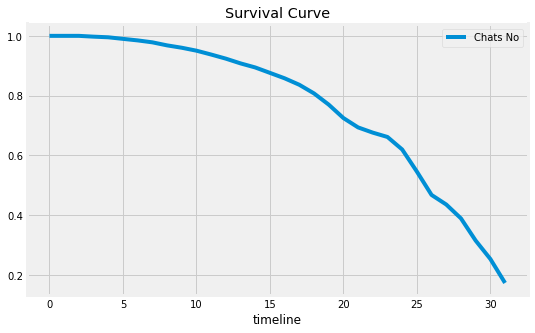

In [26]:
# Overall
kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve')
plt.show()

In [27]:
# Print survival probabilities at each year
kmf.survival_function_

,Chats No
timeline,
0.0,1.000000
1.0,1.000000
2.0,1.000000
3.0,0.997306
4.0,0.995207
5.0,0.989925
6.0,0.984798
7.0,0.978333
8.0,0.968189


COMPARING USER SEGMENTS

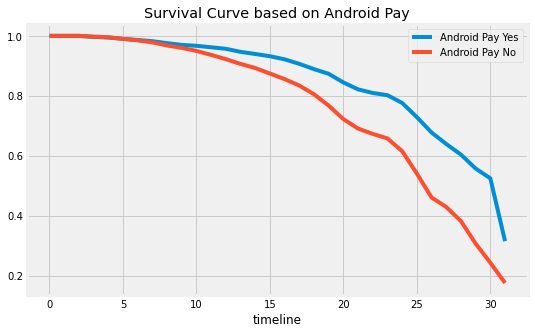

In [15]:
# Android Pay
android_pay_yes = (df['android_pay_flag'] == 1)
android_pay_no = (df['android_pay_flag'] == 0)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[android_pay_yes]['weeks_since_activation'], 
        event_observed=df[android_pay_yes]['churn_flag'], 
        label='Android Pay Yes')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[android_pay_no]['weeks_since_activation'], 
        event_observed=df[android_pay_no]['churn_flag'], 
        label='Android Pay No')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve based on Android Pay')
plt.show()

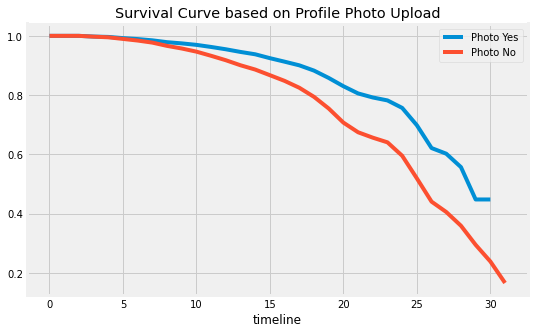

In [18]:
# Profile Photo
photo_yes = (df['photo_flag'] == 1)
photo_no = (df['photo_flag'] == 0)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[photo_yes]['weeks_since_activation'], 
        event_observed=df[photo_yes]['churn_flag'], 
        label='Photo Yes')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[photo_no]['weeks_since_activation'], 
        event_observed=df[photo_no]['churn_flag'], 
        label='Photo No')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve based on Profile Photo Upload')
plt.show()

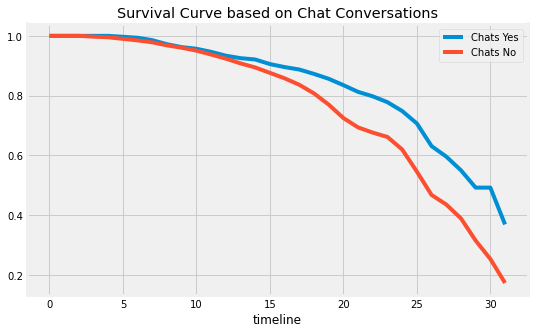

In [25]:
# Chats
chats_yes = (df['chats_flag'] == 1)
chats_no = (df['chats_flag'] == 0)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[chats_yes]['weeks_since_activation'], 
        event_observed=df[chats_yes]['churn_flag'], 
        label='Chats Yes')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[chats_no]['weeks_since_activation'], 
        event_observed=df[chats_no]['churn_flag'], 
        label='Chats No')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve based on Chat Conversations')
plt.show()

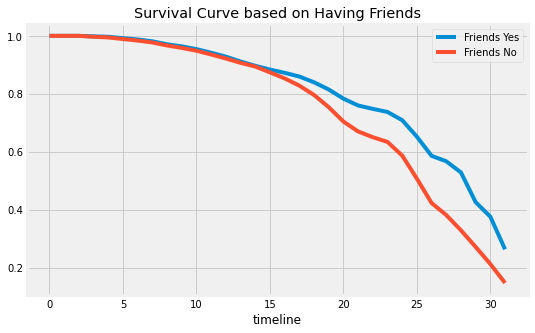

In [21]:
# Friends
friends_yes = (df['friends_flag'] == 1)
friends_no = (df['friends_flag'] == 0)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[friends_yes]['weeks_since_activation'], 
        event_observed=df[friends_yes]['churn_flag'], 
        label='Friends Yes')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[friends_no]['weeks_since_activation'], 
        event_observed=df[friends_no]['churn_flag'], 
        label='Friends No')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve based on Having Friends')
plt.show()

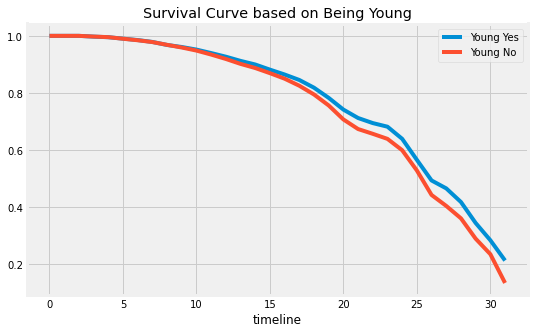

In [22]:
# Age
young_yes = (df['young_flag'] == 1)
young_no = (df['young_flag'] == 0)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[young_yes]['weeks_since_activation'], 
        event_observed=df[young_yes]['churn_flag'], 
        label='Young Yes')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[young_no]['weeks_since_activation'], 
        event_observed=df[young_no]['churn_flag'], 
        label='Young No')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve based on Being Young')
plt.show()

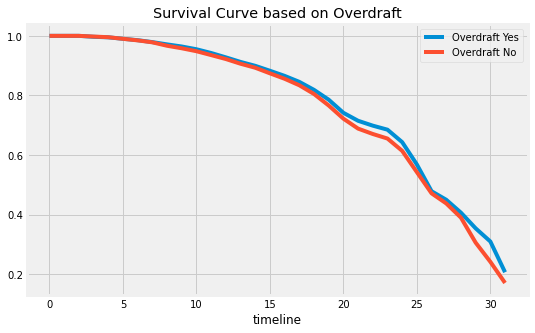

In [23]:
# Overdraft
overdraft_yes = (df['overdraft_flag'] == 1)
overdraft_no = (df['overdraft_flag'] == 0)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[overdraft_yes]['weeks_since_activation'], 
        event_observed=df[overdraft_yes]['churn_flag'], 
        label='Overdraft Yes')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[overdraft_no]['weeks_since_activation'], 
        event_observed=df[overdraft_no]['churn_flag'], 
        label='Overdraft No')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve based on Overdraft')
plt.show()